In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

In [2]:
N = 1000
f_s = 100
T_s = 1/f_s # 10 ms, 샘플 간 간격
print(T_s, "seconds")
print(T_s*1000, "ms")

0.01 seconds
10.0 ms


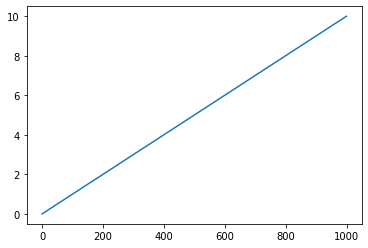

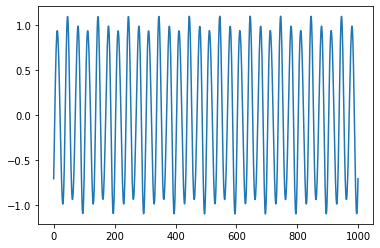

Text(0.5, 1.0, 'Visualizing samples')

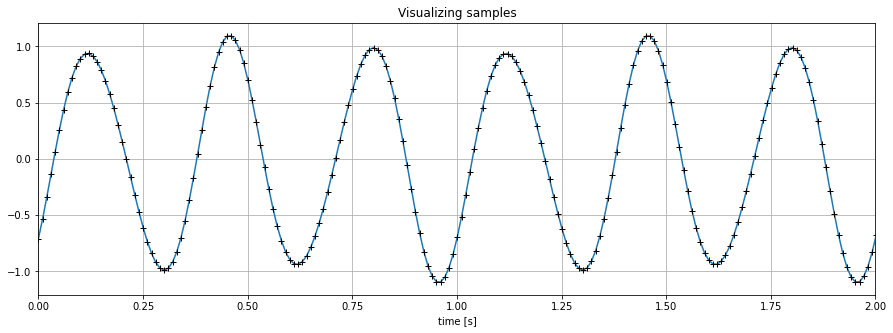

In [11]:
t = np.linspace(0, T_s*N, N)
x_t = 0.1*np.sin(2*np.pi*5*t) + np.sin(2*np.pi*3*t-np.pi/4) # 분석하려는 신호

plt.plot(t)
plt.show()
plt.plot(x_t)
plt.show()

plt.figure(figsize=(15,5))
plt.plot(t, x_t)
plt.plot(t, x_t, "k+")
plt.xlabel("time [s]")
plt.xlim([0, 2])
plt.grid()
plt.title("Visualizing samples")

In [ ]:
# 샘플 수로 각 sin 성분의 주기를 설명할 수 있습니다
# the frequency in the reciprocal:
# T/Ts = 20(samples), 1/20 = 0.05 
# T/Ts = 33(samples), 1/33 = 0.0303
# -> T/Ts라는 연산은 다음에 Si라는 period로 정의되어 사용된다.
# T = Ti
# Alternatively we can express the frequency relative to the number of samples, N=1000
# 1000/20 = 50
# 1000/33 = 30.30

# FFT method cannot extract frequency information lower than fs/2

In [12]:
# < FFT >
a_f = fft(x_t)
# a_f = the real and imaginary part(amplitude and phase for specific frequncy)
# The "frequency" after the FFT is defined as N/Si in the period of specific sinus component.
# The period Si is expressed in number of samples.

a_f.dtype
# FFT returns a symmetric shape with 
# positive frequencies on the right side and negative on the left:

dtype('complex128')

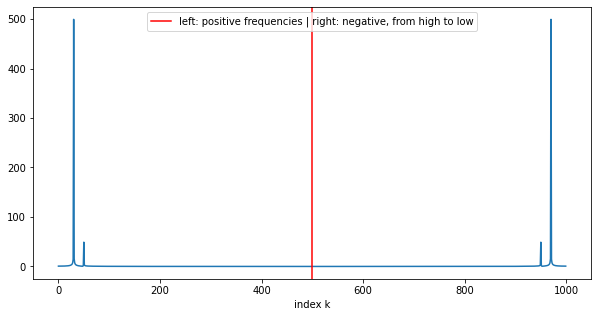

In [13]:
plt.figure(figsize=(10,5))
plt.plot(np.abs(a_f)) # we take abs in order to get the magnitude of a complex number
plt.axvline(N//2, color="red", label="left: positive frequencies | right: negative, from high to low")
plt.xlabel("index k") # k = frequency component
plt.legend();

In [14]:
# Because we are interested in positive frequencies for now we cut the returned array in half:

a_f_positive = a_f[:N//2]
a_f_positive.shape

(500,)

Text(0.5, 0, 'frequency in $k = N/s_i$')

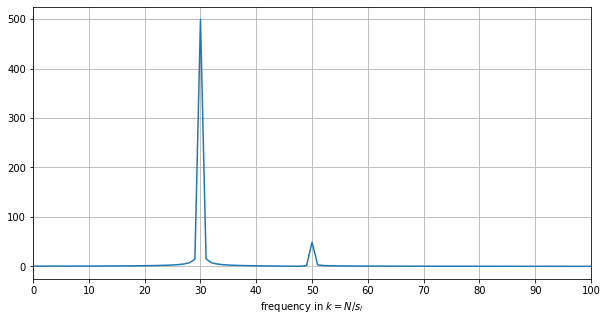

In [15]:
plt.figure(figsize=(10,5))
plt.plot(np.abs(a_f_positive))
plt.xlim([0, 100])
plt.xticks(range(0, 101, 10))
plt.grid()
plt.xlabel("frequency in $k = N/s_i$")

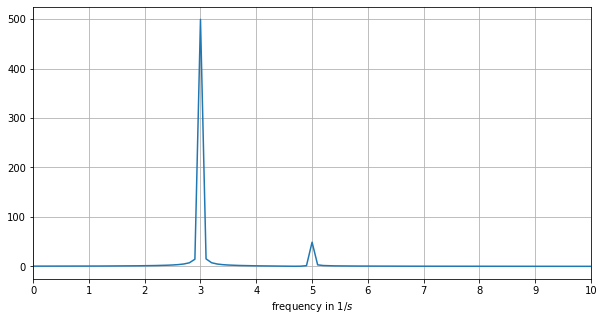

In [16]:
# K를 time domain에서 freq domain으로 변환하기 위해
f_i = np.arange(0, N//2)*f_s/N # (k*f_s)/N, f_i는 freq_domain으로 변환된 K

plt.figure(figsize=(10,5))
plt.plot(f_i, np.abs(a_f_positive))
plt.grid()
plt.xlabel("frequency in $1/s$")
plt.xticks(range(0, f_s//2, 1));
plt.xlim([0, 10]);

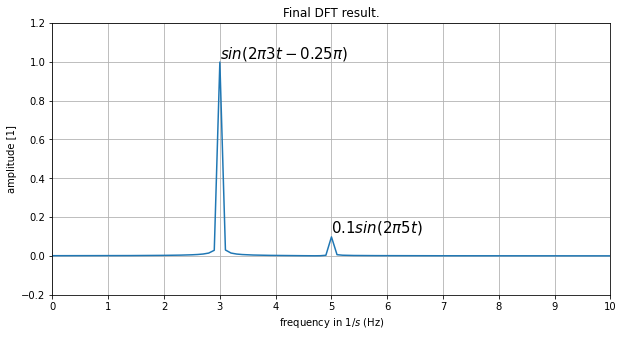

In [17]:
# 2/N으로 magnitude를 정규화 시킨다 (2/1000=500)
plt.figure(figsize=(10,5))
plt.plot(f_i, 2/N*np.abs(a_f_positive))
plt.grid()
plt.xlabel("frequency in $1/s$ (Hz)")
plt.ylabel("amplitude [1]")
plt.xticks(range(0, f_s//2, 1));
plt.xlim([0, 10]);
plt.ylim([-0.2, 1.2]);
plt.title("Final DFT result.")
plt.text(3, 1.02, "$sin(2\pi 3t - 0.25\pi)$", fontdict={"size": 15})
plt.text(5, 0.12, "$0.1 sin(2\pi 5t)$", fontdict={"size": 15});

(0.0, 10.0)

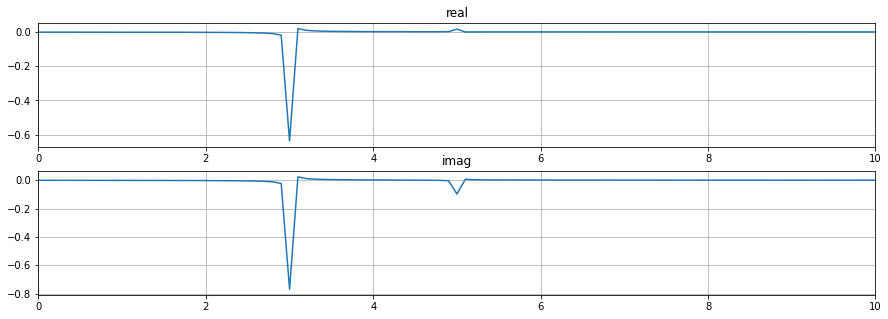

In [19]:
# <Phase>
# Let's plot the real and imaginary parts relative to frequency.
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
plt.title("real")
plt.plot(f_i, 2/N*np.real(a_f_positive))
plt.grid()
plt.xlim([0, 10])

plt.subplot(2, 1, 2)
plt.title("imag")
plt.plot(f_i, 2/N*np.imag(a_f_positive))
plt.grid()
plt.xlim([0, 10])

(-150.0, 100.0)

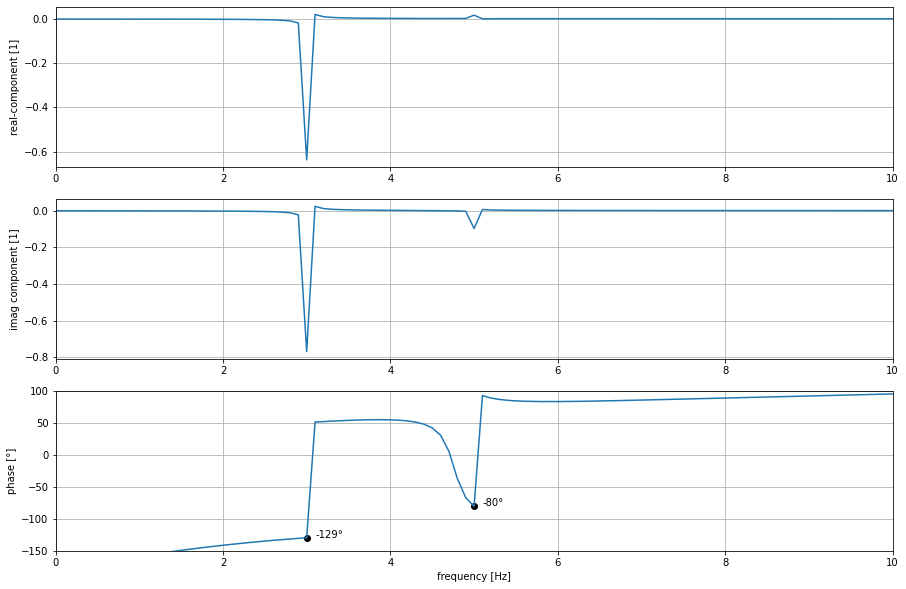

In [23]:
# Lets calculate the angle of the complex number:
# angle = arctan*(imag/real)
# in python,
angle = np.angle(a_f_positive, deg=True)
# OR manually
# angle = np.arctan2(2/N*np.imag(a_f_positive),(2/N*np.real(a_f_positive)))*grad_to_d

plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.ylabel("real-component [1]")
plt.plot(f_i, 2/N*np.real(a_f_positive))
plt.grid()
plt.xlim([0, 10])
plt.subplot(3, 1, 2)
plt.ylabel("imag component [1]")
plt.plot(f_i, 2/N*np.imag(a_f_positive))
plt.grid()
plt.xlim([0, 10])
plt.subplot(3, 1, 3)
plt.plot(f_i, angle)
plt.grid()
plt.ylabel("phase [°]")
plt.xlabel("frequency [Hz]")
plt.xlim([0, 10])

plt.scatter(f_i[[30, 50]], angle[[30, 50]], color="k")
plt.text(f_i[30] + 0.1 , angle[30], "%d°" % int(angle[30]))
plt.text(f_i[50] + 0.1 , angle[50], "%d°" % int(angle[50]))
plt.ylim([-150, 100])

# 5Hz -> 약 -90 degree, cos wave에 -90도 차이나므로 (???)
# 3hz -> -90도 에서 -45도 더 shift됨 (???)

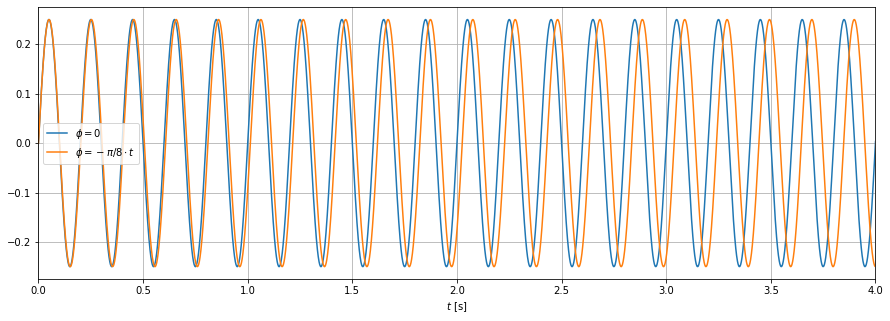

In [25]:
# < FFT on complex numbers >
# Because within the multi-chirp FMCW algorithm, we do a FFT on a series of complex numbers
# we want to make a simple example here.

# The phase shift is time dependent in this example.
def f(t, phi=0):
    return 0.25*np.sin(2*np.pi*5*t + phi)

t = np.linspace(0, 10, 10000)
plt.figure(figsize=(15,5))
plt.plot(t, f(t), label="$\phi=0$")
plt.plot(t, f(t, -np.pi/8*t), label="$\phi=-\pi/8 \cdot t$")
plt.xlim([0, 4])
plt.xlabel("$t$ [s]")
plt.grid()
plt.legend();

# 시간이 흐름에 따라 주황색 라인의phase가 점점 바뀐다

In [26]:
T_cycle = 2 # seconds
n_cycles = 200
f_cycle = 1/T_cycle

# Per cycle FFT config
f_s = 100
T_s = 1/f_s
N = int(T_cycle/T_s)

print("Sample frequency:", f_s, "Hz")
print("Sample period:", T_s, "sec")
print("Number samples:", N)

Sample frequency: 100 Hz
Sample period: 0.01 sec
Number samples: 200


In [31]:
# We run FFT in each cycle and save the results in a list.

fft_cycle_results = list() # result list

# for each cycle
for c in range(n_cycles):
    
    # determine start and end of a cycle
    t_start = c*T_cycle
    t_end = (c+1)*T_cycle
    
    # sample the signal at according timesteps
    t_sample = np.arange(t_start, t_end, T_s)
    f_sample = f(t_sample, -np.pi/8*t_sample)
    
    # run FFT and append results
    fft_res = fft(f_sample)
    fft_cycle_results.append(fft_res)

# We cut the positive frequency range and normalize the amplitudes
fft_cycle_results = [2/N*r[:N//2] for r in fft_cycle_results]
freq = np.arange(0, N//2)*f_s/N
freq

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
       33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. ,
       38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5,
       44. , 44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. ,
       49.5])

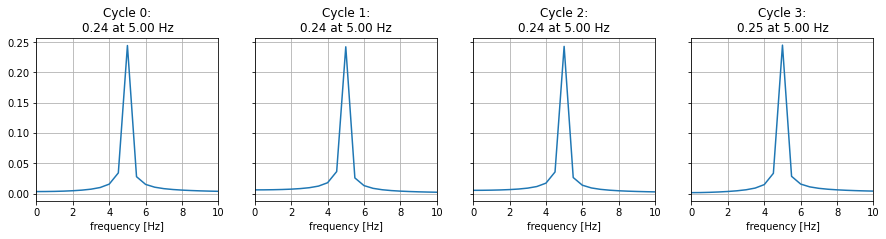

In [33]:
# The FFT will show a peak at 5Hz with a different phase each time.
# Because the frequency is almost the same in each cycle, we expect the same behaviour in each result:

n_cycles_to_display = 4
fft_res_display = fft_cycle_results[:n_cycles_to_display]

fig, ax = plt.subplots(ncols=len(fft_res_display), figsize=(15, 3), sharex=True, sharey=True)
for i, ax, res in zip(range(n_cycles_to_display), ax, fft_res_display):
    res_abs = np.abs(res)
    ax.plot(freq, res_abs)
    ax.grid(True)
    ax.set_xlim([0, 10])
    ax.set_xlabel("frequency [Hz]")
    
    k = np.argmax(res_abs)
    magn_max = res_abs[k]
    freq_max = freq[k]
    
    ax.set_title("Cycle %d:\n%.2f at %.2f Hz" % (i, magn_max, freq_max))

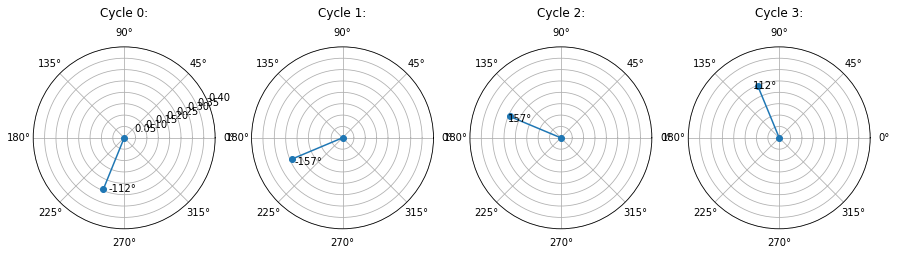

In [35]:
# It seems that the position (frequency) of the peaks remains eqal, despite the changing real and imaginary components.
# Let's collect the max. frequency component from each cycle

cycle_max_list = list()

for res in fft_cycle_results:
    # calc. the magnitude
    res_abs = np.abs(res)
    
    # find frequency index
    k = np.argmax(res_abs)
    cycle_max_list.append(res[k])

n_cycles_to_display = 4
cycle_max_list_display = cycle_max_list[:n_cycles_to_display]

fig, ax = plt.subplots(ncols=len(cycle_max_list_display), figsize=(15, 30), 
                       subplot_kw={'projection': "polar"}, sharey=True)

for i, ax, res in zip(range(n_cycles_to_display), ax, cycle_max_list_display):
    ax.plot([0, np.angle(res)], [0, np.abs(res)], marker="o")
    ax.text(np.angle(res)+0.1, np.abs(res), "%d°" % int(np.angle(res, deg=True)))
    ax.set_ylim([0, 0.4])
    ax.set_title("Cycle %d:\n" % (i, ))

# We can observe that the angle moves in negative direction with -45도


In [36]:
# < Solution via phase differences >
# Now we could calculate ange velocity by taking differences between cycles and put them relative to cycle duration:
angle_diff = np.diff(np.angle(cycle_max_list, deg=True))
angle_vel = angle_diff/T_cycle
print(angle_vel[:10])


[-22.57811002 157.25241595 -22.41998496 -22.25432097 -22.57811002
 -22.74758405 -22.41998496 -22.25432097 -22.57811002 157.25241595]


-22.5
Angle velocities: [-22.57811002 -22.74758405 -22.41998496 -22.25432097 -22.57811002
 -22.74758405 -22.41998496 -22.25432097 -22.57811002 -22.74758405]


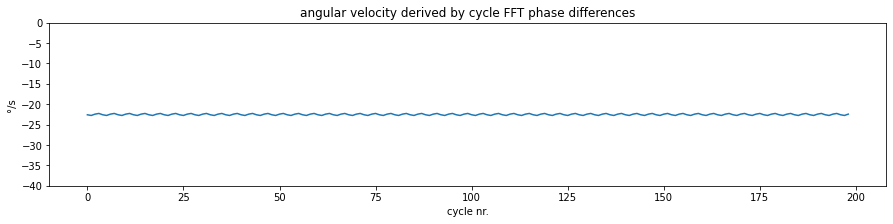

In [39]:
# Let's look at the parameter v = -(pi/8)
v = -np.pi/8*360/(2*np.pi)
print(v)

angle_vel[angle_vel>0] -= 180
print("Angle velocities:", angle_vel[:10])

plt.figure(figsize=(15,3))
plt.plot(angle_vel)
plt.xlabel("cycle nr.")
plt.ylabel("°/s")
plt.title("angular velocity derived by cycle FFT phase differences")
plt.ylim([-40, 0]);

# As you can see, the phases of the FFT output from each cycle give a hint over the phase velocity  of the signal in time domain.
# Summary: We found v

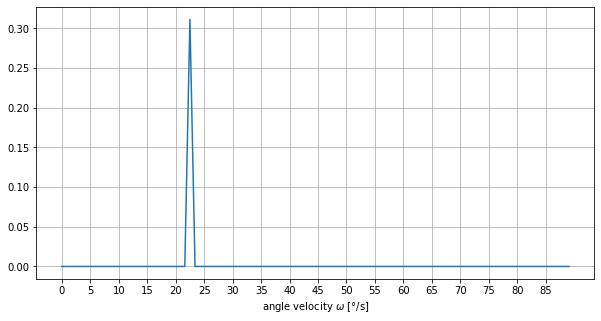

In [42]:
# < Solution via second FFT > 
# The core idea of this alternative approach is to extract the periodic change of phase .

# We can find the phase velocity via a second FFT over the cycle results, too. Consider the first FFT result as a measurement/sample for the second FFT.
# Remember, those are our results (FFT-magnitude from the -component):

cycle_max_list[:5]
# here, we take only the positive side of fft
second_fft_res = fft(cycle_max_list)[:n_cycles//2]
second_fft_res[:5]
# Like in the introductory example, each element of second_fft_res represents a frequency component.
freq_second = np.arange(0, n_cycles//2)*f_cycle/n_cycles
omega_second = 360*freq_second  # same as 2*np.pi*
omega_second

plt.figure(figsize=(10,5))
plt.plot(omega_second, np.abs(second_fft_res))
plt.grid()
plt.xlabel("angle velocity $\omega$ [°/s]")
plt.xticks(range(0, 90, 5));
# As you could see we could detect the phase change v=22.5 degree with a second FFT on the results of the first FFT.